In [3]:
# Use this notebook as a template to create popular supervised machine learning models for regression

In [21]:

GymData=pd.read_excel('D:/R Case Studies/SampleData.xlsx')

GymData.head()

,Hours,Calories,Weight
0,1.000,2500,95
1,2.000,2000,85
2,2.500,1900,83
3,3.000,1850,81
4,3.500,1600,80


In [22]:
ColumnNames=['Hours','Calories', 'Weight']
DataValues=[[  1.0,   2500,   95],
            [  2.0,   2000,   85],
            [  2.5,   1900,   83],
            [  3.0,   1850,   81],
            [  3.5,   1600,   80],
            [  4.0,   1500,   78],
            [  5.0,   1500,   77],
            [  5.5,   1600,   80],
            [  6.0,   1700,   75],
            [  6.5,   1500,   70]]
# Create the Data Frame
GymData=pd.DataFrame(data=DataValues,columns=ColumnNames)
GymData.head()

# Separate Target Variable and Predictor Variables
TargetVariable='Weight'
Predictors=['Hours','Calories']
X=GymData[Predictors].values
y=GymData[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)


# Measuring accuracy on Testing Data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, prediction))
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 Value: 0.905683847544
Accuracy 98.0761247091


,Hours,Calories,Weight,PredictedWeight
0,6.000,1700.000,75,76.502
1,2.000,2000.000,85,86.569


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
R2 Value: -0.04
Accuracy 93.6470588235


,Hours,Calories,Weight,PredictedWeight
0,6.000,1700.000,75,81.000
1,2.000,2000.000,85,81.000


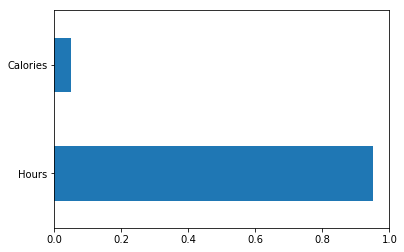

In [35]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
RegModel = tree.DecisionTreeRegressor(max_depth=3,criterion='mse')

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DTree=RegModel.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring Goodness of Fit by R2 and accuracy by 100-MAPE on Testing Data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, prediction))
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
R2 Value: 0.91864
Accuracy 98.3011764706


,Hours,Calories,Weight,PredictedWeight
0,6.000,1700.000,75,76.860
1,2.000,2000.000,85,84.220


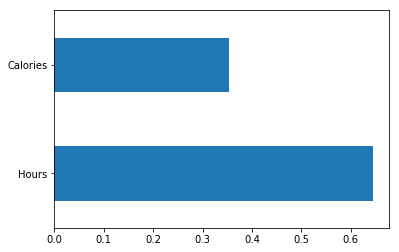

In [39]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(n_estimators=100,criterion='mse')

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring Goodness of Fit by R2 and accuracy by 100-MAPE on Testing Data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, prediction))
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1, loss='linear', n_estimators=50,
         random_state=None)
R2 Value: 0.433560090703
Accuracy 95.2717086835


,Hours,Calories,Weight,PredictedWeight
0,6.000,1700.000,75,78.857
1,2.000,2000.000,85,81.333


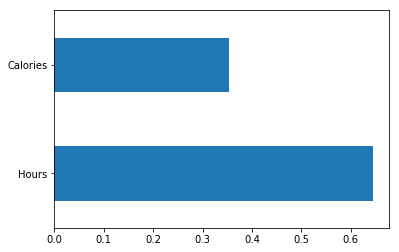

In [40]:
# Adaboost 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring Goodness of Fit by R2 and accuracy by 100-MAPE on Testing Data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, prediction))
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
[18:29:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.799748381553
Accuracy 97.1888176413


,Hours,Calories,Weight,PredictedWeight
0,6.000,1700.000,75,72.548
1,2.000,2000.000,85,83.000


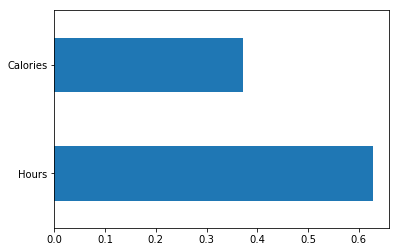

In [41]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring Goodness of Fit by R2 and accuracy by 100-MAPE on Testing Data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, prediction))
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()

In [45]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=2)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring Goodness of Fit by R2 and accuracy by 100-MAPE on Testing Data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, prediction))
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')
R2 Value: 0.32
Accuracy 94.9019607843


,Hours,Calories,Weight,PredictedWeight
0,6.000,1700.000,75,80.000
1,2.000,2000.000,85,82.000


SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2 Value: 0.653999860694
Accuracy 96.4156857517


,Hours,Calories,Weight,PredictedWeight
0,6.000,1700.000,75,78.700
1,2.000,2000.000,85,86.900


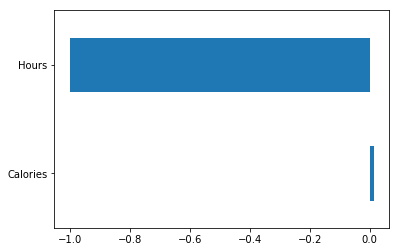

In [46]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=2, kernel='linear')

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring Goodness of Fit by R2 and accuracy by 100-MAPE on Testing Data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, prediction))
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()